## Importing Required Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To give multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Loading Dataset

In [36]:
out_df = pd.read_csv(r"C:\Task\demo_data\5.outlier.csv",header = None)

### Insights of Dataset

In [37]:
out_df.head()
out_df.shape
out_df.info()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


(600, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


### Plotting Scatterplot to visualize the input and output

In [38]:
# for HD visualizations
%config InlineBackend.figure_format='retina'

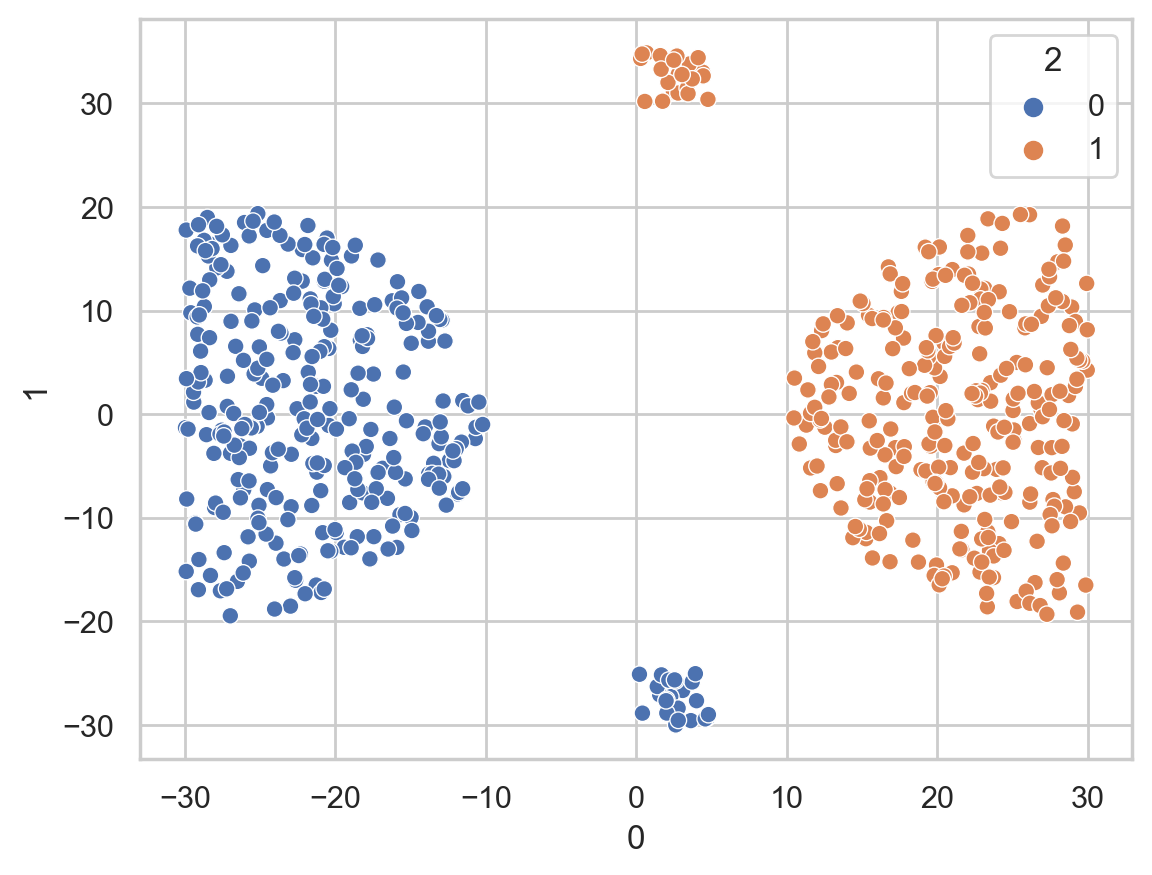

In [39]:
sns.set(style='whitegrid')
sns.scatterplot(x = out_df[0],y = out_df[1] ,hue = out_df[2],data = out_df);

### Train & test Split of the dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(out_df[[0,1]], out_df[2], test_size = 0.2)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# Performing standardization 
scaler = StandardScaler()
X_trainf = scaler.fit_transform(X_train)
X_testf = scaler.transform(X_test)

## Building Model 

## 1st Round

In [44]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [45]:
model = Sequential()
model.add(Dense(8,activation='relu',kernel_initializer = 'random_uniform' ,input_dim = 2))
model.add(Dense(4,activation='relu',kernel_initializer = 'random_uniform'))

model.add(Dense(2,activation='relu',kernel_initializer = 'random_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 24        
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 2)                 10        
                                                                 
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [47]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [48]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=222,validation_split=0.2)

Epoch 1/222


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


39/39 [==============================] - 1s 5ms/step - loss: 0.6932 - accuracy: 0.4661 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 2/222
39/39 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 3/222
39/39 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 4/222
39/39 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 5/222
39/39 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 6/222
39/39 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 7/222
39/39 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 8/222
39/39 [======

### Evaluation of Model

In [49]:
y_pred = model.predict(X_testf) 

4/4 [==============================] - 0s 2ms/step


In [50]:
y_capf = np.where(y_pred>0.5,1,0)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.4583333333333333

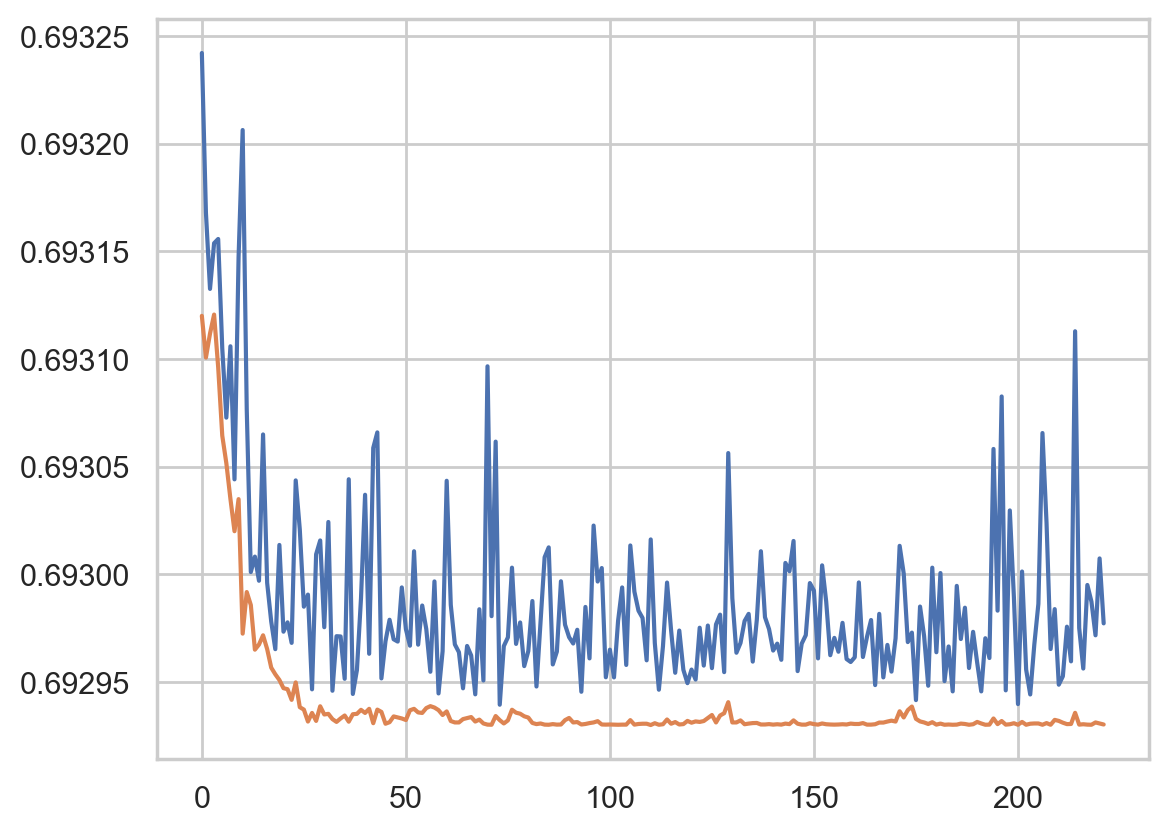

In [52]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### Plotting Decision Regions

In [53]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 10s 1ms/step


C:\Users\prave\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot: >

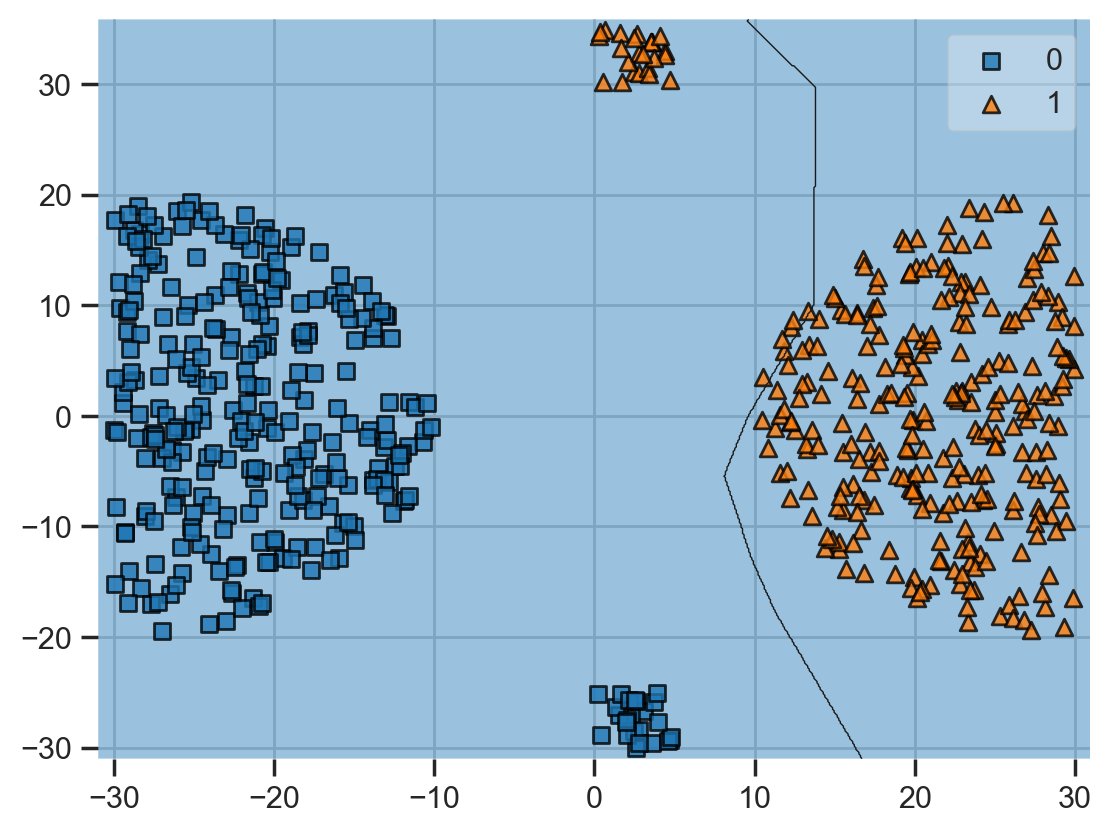

In [54]:
plot_decision_regions(out_df[[0,1]].values, out_df[2].values.astype(int), clf = model)

## 2nd Round

In [55]:
model = Sequential()
model.add(Dense(5,activation = 'relu',kernel_initializer = 'he_uniform',input_dim = 2)) # No.of Neurons
model.add(Dense(3,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(Dense(2,activation = 'relu',kernel_initializer = 'he_uniform'))

model.add(Dense(1,activation = 'sigmoid'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 15        
                                                                 
 dense_12 (Dense)            (None, 3)                 18        
                                                                 
 dense_13 (Dense)            (None, 2)                 8         
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [57]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [58]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=183,validation_split=0.2)

Epoch 1/183


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


39/39 [==============================] - 1s 5ms/step - loss: 0.7047 - accuracy: 0.7552 - val_loss: 0.6515 - val_accuracy: 0.8854
Epoch 2/183
39/39 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.8568 - val_loss: 0.6219 - val_accuracy: 0.8958
Epoch 3/183
39/39 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.8568 - val_loss: 0.5983 - val_accuracy: 0.9167
Epoch 4/183
39/39 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.8620 - val_loss: 0.5739 - val_accuracy: 0.9375
Epoch 5/183
39/39 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.8750 - val_loss: 0.5492 - val_accuracy: 0.9479
Epoch 6/183
39/39 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.8906 - val_loss: 0.5197 - val_accuracy: 0.9479
Epoch 7/183
39/39 [==============================] - 0s 3ms/step - loss: 0.5128 - accuracy: 0.8984 - val_loss: 0.4867 - val_accuracy: 0.9583
Epoch 8/183
39/39 [======

### Evaluation of Model

In [59]:
y_pred = model.predict(X_testf) 

4/4 [==============================] - 0s 2ms/step


In [60]:
y_capf = np.where(y_pred>0.5,1,0)

In [61]:
accuracy_score(y_test,y_capf)

1.0

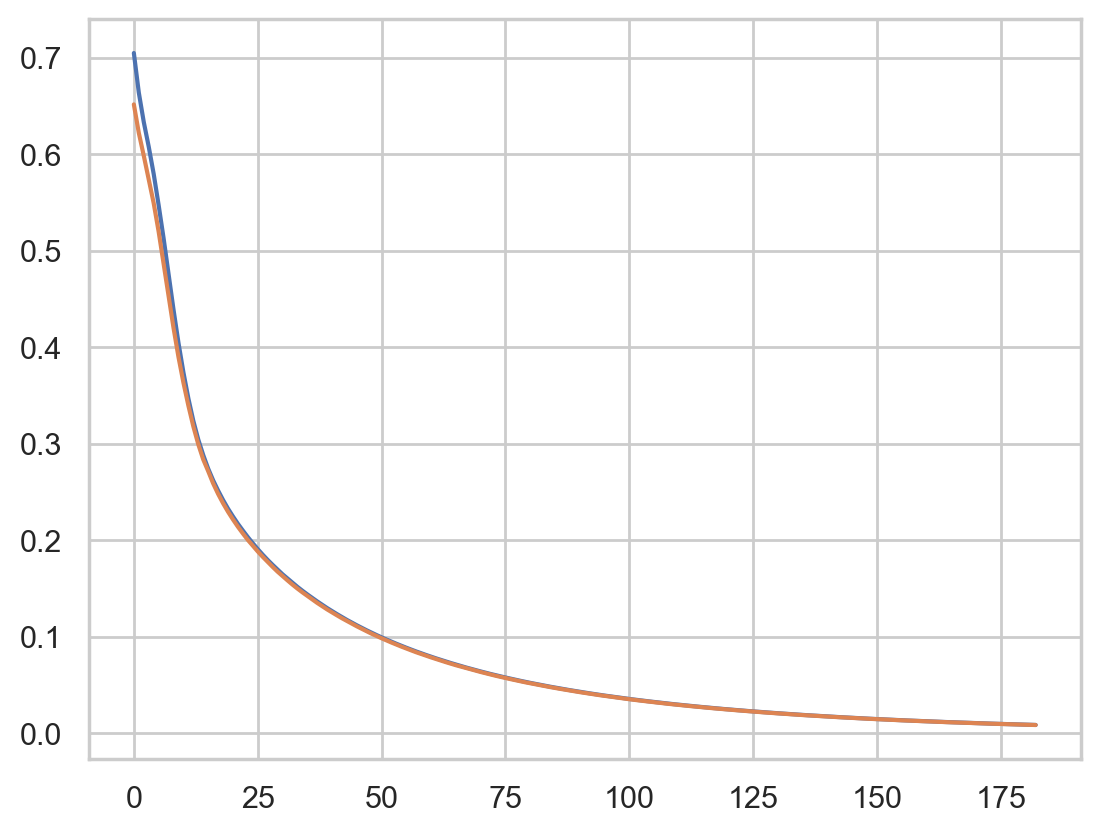

In [62]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

9600/9600 [==============================] - 10s 1ms/step


<AxesSubplot: >

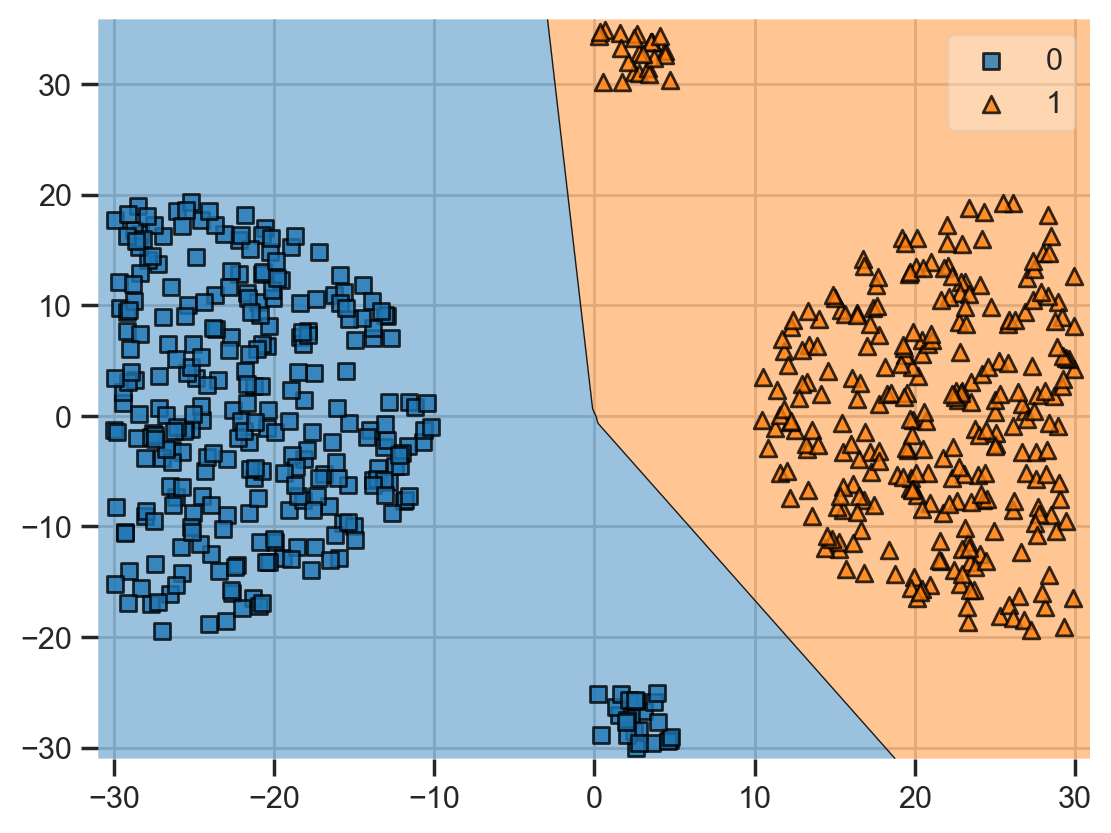

In [63]:
plot_decision_regions(out_df[[0,1]].values, out_df[2].values.astype(int), clf = model)